<h4>Electrical RLC Circuit</h4>

Consider an RLC circuit with $R=50\,\Omega$, $L=0.1\,H$, and $C=5\times{}10^{-4}\,F$. At time $t=0$, when both $I(0)$ and $Q(0)$ are zero, the circuit is connected to a $110\,V\;{}60\,Hz$ alternating current generator. Find the current in the circuit and the time lag of the steady periodic current behind the voltage.

This has errors. See Schmierbuch 3611 for some illuminating corrections.

In [1]:
om=110*120

13200

In [41]:
E(t)=110*sin(120*pi*t)

E (generic function with 1 method)

In [2]:
using Polynomials

In [99]:
poly=Polynomial([2000,50,0.1])

Polynomial(2000.0 + 50.0*x + 0.1*x^2)

In [101]:
rts=roots(poly)

2-element Vector{Float64}:
 -456.15528128088306
  -43.84471871911697

In [5]:
120^2

14400

In [6]:
50*120

6000

In [102]:
using LinearAlgebra # starting here incorrect because I took C=5x10^4 instead of 5x10^(-4)

In [8]:
M=[(-1440)*pi^2+0.002 6000*pi
(-6000)*pi (-1440)*pi^2+0.002]

2×2 Matrix{Float64}:
 -14212.2   18849.6
 -18849.6  -14212.2

In [9]:
b=[0
13200*pi]

2-element Vector{Float64}:
     0.0
 41469.02302738527

In [10]:
AB=inv(M)*b

2-element Vector{Float64}:
 -1.4026237512381412
 -1.05755324461067

In [11]:
A=AB[1,1]

-1.4026237512381412

In [12]:
B=AB[2,1]

-1.05755324461067

In [15]:
1/0.00004

24999.999999999996

In [16]:
N=[1 1
    -1/500 -25000]

2×2 Matrix{Float64}:
  1.0         1.0
 -0.002  -25000.0

In [17]:
a=[A
-B/(120*pi)]

2-element Vector{Float64}:
 -1.4026237512381412
  0.0028052471077110075

In [20]:
sol=inv(N)*a

2-element Vector{Float64}:
 -1.402623751238157
  1.5790612258117338e-14

In [21]:
c1=sol[1,1]

-1.402623751238157

In [22]:
c2=sol[2,1]

1.5790612258117338e-14

In [23]:
I(t)=A*cos(120*pi*t)+B*sin(120*pi*t)+c1*exp(-500*t)+c2*exp(-0.00004*t)

I (generic function with 1 method)

In [39]:
Isp(t)=A*cos(120*pi*t)+B*sin(120*pi*t)

Isp (generic function with 1 method)

In [24]:
using Plots

In [36]:
rng1=range(-0.0001,stop=0.12,length=1000)

-0.0001:0.00012022022022022022:0.12

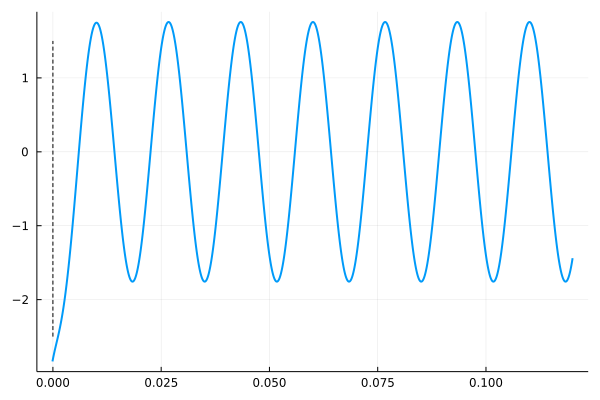

In [37]:
plot(rng1,I.(rng1),line=2,leg=false)
plot!([0,0],[-2.5,1.5],ls=:dash,lc=:black)

In [103]:
E0=110 # starting here things are correct again

110

In [57]:
omega=120*pi

376.99111843077515

In [58]:
R=50

50

In [59]:
L=0.1

0.1

In [89]:
C=5*10^(-4)

0.0005000000000000002

In [90]:
alpha=atan((omega*R*C)/(1-L*C*omega^2))+pi

2.145679023883526

In [91]:
Z=sqrt(R^2+(omega*L-1/(omega*C))^2)

59.57657095696974

In [94]:
E0/Z

1.8463633981124812

In [95]:
delta=atan((L*C*omega^2-1)/(omega*R*C))

0.5748826970886296

In [96]:
tl=delta/omega

0.001524923715660936

In [97]:
Ispa(t)=(E0*cos(omega*t-alpha-tl))/Z

Ispa (generic function with 1 method)

In [38]:
rng2=range(-0.0001,stop=0.05,length=1000)

-0.0001:5.015015015015015e-5:0.05

In [85]:
K=sqrt(A^2+B^2)

1.7566366308158072

In [83]:
olpha=atan(B/A)+pi

3.7876374584929753

In [86]:
Ispb(t)=K*cos(120*pi*t-olpha)

Ispb (generic function with 1 method)

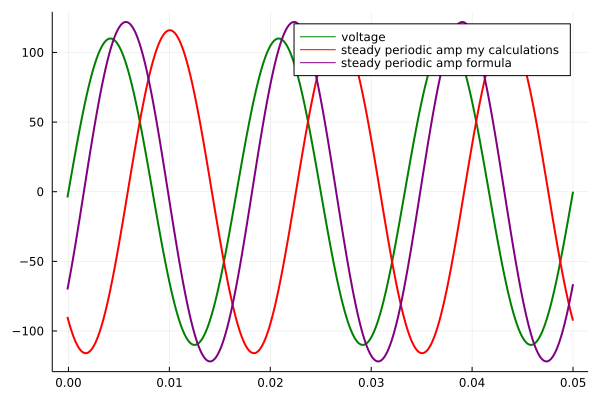

In [98]:
plot(rng2,E.(rng2),line=2,lc=:green,label="voltage")
plot!(rng2,66*Ispb.(rng2),line=2,lc=:red,label="steady periodic amp my calculations")
plot!(rng2,66*Ispa.(rng2),line=2,lc=:purple,label="steady periodic amp formula")

I did this two ways. First, I solved the diffeq (formulas for Isp and Ispb, see Schmierbuch 3611). Then I used the formulas in EPC 211f for formula Ispa. The amplitudes agree but the time lag doesn't, so there is a problem. Strangely, for both my calculations and the the formula the amperage lags behind the voltage whereas on page 212 of EPC in the diagram the voltage lags behind the amperage and EPC say "time lag of the steady periodic current behind the input voltage." <font color="red">Update: the problem is that I copied down C incorrectly as 5x10^4 instead of 5x10^(-4)</font>

In [88]:
omega

376.99111843077515

In [104]:
r1=rts[1,1]

-456.15528128088306

In [105]:
r2=rts[2,1]

-43.84471871911697

In [106]:
M1=[1 1
r1 r2]

2×2 Matrix{Float64}:
    1.0      1.0
 -456.155  -43.8447

In [114]:
b1=[11/200
1100]

2-element Vector{Float64}:
    0.055
 1100.0

In [115]:
x1=inv(M1)*b1

2-element Vector{Float64}:
 -2.673740523842158
  2.7287405238421583

In [116]:
I2(t)=11/200+x1[1,1]*exp(r1*t)+x1[2,1]*exp(r2*t)

I2 (generic function with 1 method)

In [112]:
rng3=range(-0.0001,stop=1.2,length=1000)

-0.0001:0.0012013013013013013:1.2

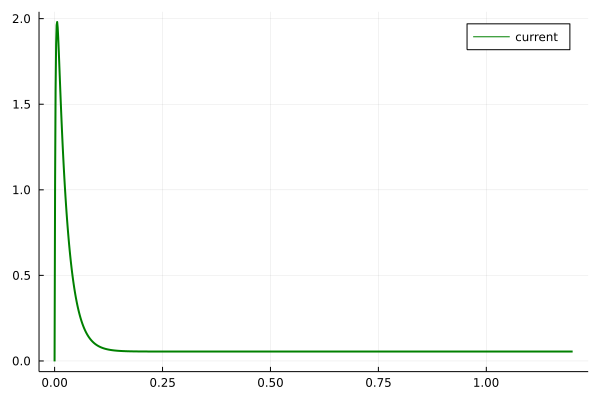

In [117]:
plot(rng3,I2.(rng3),line=2,lc=:green,label="current")

<font color="red">This is not correct as for both EPC 212:1 and 213:2 I failed to differentiate E(t) for the RHS of the diffeq.</font>